# Finding Indicators of Heavy Traffic on I-94

## Aim
Identify correlations between environmental variables such as weather and time of day and high traffic volumes in order to better target strategies to reduce the negative impacts of slow-moving traffic on the local economy.

## Methodology
Data is likely parametric and monotonic, perhaps linear for date and time and the data set is large enough at 48k rows for any calculation.

Therefore, correlations can best be calculated using:
- Pearson coefficient for continuous data.
- Spearman rank coefficient for categorical data.

## Results
- Strong correlations
- Weak correlations


# Data Set
## Source:
John Hogue, john.d.hogue '@' live.com, Social Data Science & General Mills

Available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

## Data Set Information:
Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.



## Data Dictionary
|#|column|Variable|Description|
|---| :---- |  :---   |  :------   |
|0|holiday|Categorical|US National holidays plus regional holiday, Minnesota State Fair
|1|temp| Numeric| Average temp in kelvin
|2|rain_1h| Numeric| Amount in mm of rain that occurred in the hour
|3|snow_1h| Numeric| Amount in mm of snow that occurred in the hour
|4|clouds_all| Numeric| Percentage of cloud cover
|5|weather_main| Categorical| Short textual description of the current weather
|6|weather_description| Categorical| Longer textual description of the current weather
|7|date_time| DateTime| Hour of the data collected in local CST time
|8|traffic_volume| Numeric| Hourly I-94 ATR 301 reported westbound traffic volume

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline

In [269]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [270]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [271]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


# General Distribution of Traffic Volume


In [272]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Conclusions
Traffic volume is calculated from 2012-10-02 to 2018-09-30.

The values given above do not immediately suggest a normal distribution

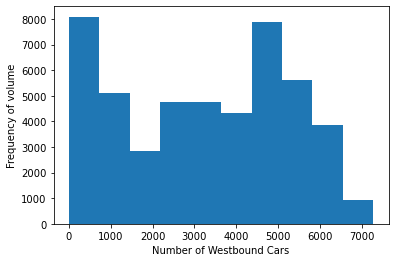

In [273]:
traffic['traffic_volume'].plot.hist()
plt.xlabel('Number of Westbound Cars')
plt.ylabel('Frequency of volume')
plt.show()

### Conclusions
Two spikes at 0-500 cars and 4500-5000 cars suggests a night/day effect.

Comparing night and day volumes is likely to be useful.

# Day / Night Distribution of Traffic Volume

In [274]:
#Investigate type of the 'date_time' column
traffic['date_time'].dtype

dtype('O')

In [275]:
#Convert to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [276]:
# Investigate new 'date_time' column
traffic['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

### Method
1. use series.dt.hour to get the hours from the 'date_time' series.
2. isolate daytime and nighttime data in new dataframes

In [277]:
# Day = 07:00 < t <= 19:00
# Night = 19:00 < t <= 07.00

day_slice = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
night_slice = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(day_slice['traffic_volume'].describe())
print(night_slice['traffic_volume'].describe())


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


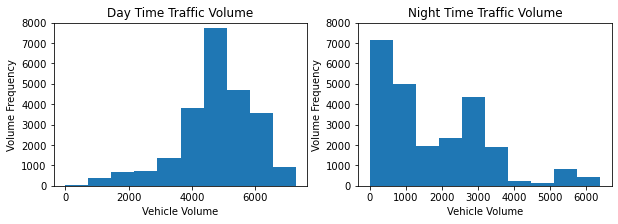

In [278]:
plt.figure(figsize=(10,3)) # Make the plots a bit wider

plt.subplot(1, 2, 1)
plt.hist(day_slice['traffic_volume'])
plt.xlabel('Vehicle Volume')
plt.ylabel('Volume Frequency')
plt.title('Day Time Traffic Volume')
plt.ylim([0, 8000]) # Set the same in both plots to make comparison easier

plt.subplot(1, 2, 2)
plt.hist(night_slice['traffic_volume'])
plt.xlabel('Vehicle Volume')
plt.ylabel('Volume Frequency')
plt.title('Night Time Traffic Volume')
plt.ylim([0, 8000])

plt.show()

### Conclusions
**Day time data** clearly has a nice normal distrubtion showing a very high volume peak which we would expect to match rush hour. Even though it is westbound traffic only, we can assume that most of the traffic which is on a time-based cycle will want to return home at some pointin the same day.

Investigating traffic_volume on an hourly basis would be interesting.

**Night time data** is nearly linear, perhaps monotonic. Traffic drops to basically nothing for most of the time. The surge at 3000 volume might be because we have the night time window set wrong.

When analysing hourly distribution it might be necessary to change assumptions of day/night divide.

# Monthly Distribution of Traffic Volume

### Method
- Create a new month column
- Groupby() the month column and plot each month.

In [279]:
day_slice['month'] = day_slice['date_time'].dt.month
by_month = day_slice.groupby(['month']).mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

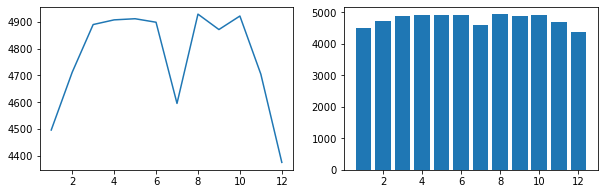

In [280]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(by_month['traffic_volume'])

plt.subplot(1,2,2)
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],by_month['traffic_volume'])
# by_month['traffic_volume'].plot.bar()
plt.show()

Initially, it looks like July might be a really slow month for traffic - perhaps to do with holidays. However, it is unlikely holidays would result in a decrease of traffic if it's also the school holiday.

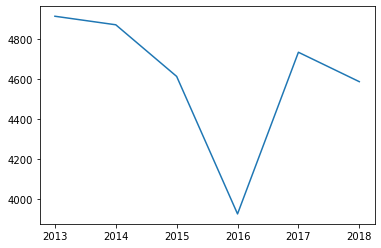

In [294]:
# New column containing only the year
day_slice['year'] = day_slice['date_time'].dt.year

# New df containing only rows captured in July
by_july_annual = day_slice[day_slice['month'] == 7]

# Group months of July by 'year' and calculate the mean of the traffic_volume
# Then plot
plt.plot(by_july_annual.groupby(['year']).mean()['traffic_volume'])
plt.show()


### Conclusions
**Winter months** are quieter on the I-94, but only by about 10%.

**July 2016** only shows a considerable drop. This might be due to construction.

# Daily Distribution of Traffic Volume

In [ ]:
traffic['day_of_week'] = day_slice['date_time'].dt.dayofweek
by_day = traffic.groupby(['day_of_week']).mean()
by_day['traffic_volume']

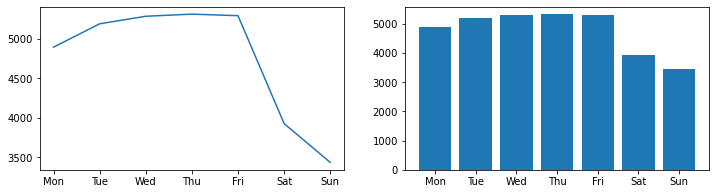

In [297]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot(by_day['traffic_volume'])
plt.xticks(range(7),('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))

plt.subplot(1,2,2)
plt.bar(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],by_day['traffic_volume'])
plt.show()

### Conclusions
**Weekends** are clearly periods of lower traffic volume. However, it is not such a significant difference that we can conclude the majority of the traffic on the road is commuter traffic. But it is enough to explain the similar drop in July.

# Hourly Distribution of Traffic Volume

In [ ]:
# New column containing only the hour for the row
day_slice['hour'] = day_slice['date_time'].dt.hour

# New column containing only the hour for the row
day_slice['dayofweek'] = day_slice['date_time'].dt.dayofweek

# Copy days Monday-Friday to a new dataframe
business_days = day_slice.copy()[day_slice['dayofweek'] <= 4] # 4 == Friday

# Copy days Saturday-Sunday to a new dataframe
weekend = day_slice.copy()[day_slice['dayofweek'] >= 5] # 5 = Saturday

# New dataframe of mean traffic_volume for each day time hour
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

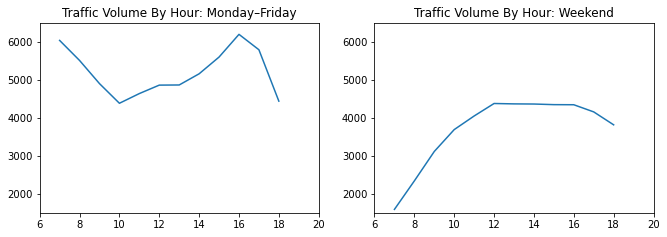

In [296]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

### Conclusions

In general, there is a small increase in traffic on working days. On working days there is the expected surge at 07:00 and 16:00 corresponding to commutes.

## Summary

- Volume is greater in the summer months.
- Volume is greater on week days.
- Volume increases at 07:00 and 16:00 corresponding to expected commuting window.

# Correlation: Traffic Volume and Weather

## Continuous variables: 
- temp
- rain_1h
- snow_1h
- clouds_all

# Correlation: Traffic Volume and Weather

## Categorical variables:
- weather_main
- weather_description